# Time Series Forecasting (Airport Monthly Passengers Traffic)

Time series forecasting is the task of predicting future values based on historical data.<br>
Below are some key terms in Time Series Analysis: (**Adding some short intro to key terms, If you want you can skip directly into code**)<br>
* **Trend**: In trend, there is no fixed interval and any divergence within the given dataset is a continuous timeline. The trend would be Negative or Positive or Null Trend
* **Seasonality**: In seasonality, regular or fixed interval shifts within the dataset in a continuous timeline. Would be bell curve or saw tooth
* **Cyclical**: There is no fixed interval, uncertainty in movement and its pattern
* **Irregularity**: Unexpected situations/events/scenarios and spikes in a short time span

## Types of time-series

1. **Stationary:** TS donn't have Trend, Seasonality & Cyclical. Also mean & variance should be constant wrt time-frame.
2. **Non-Stationary:** TS have Trend, Seasonality & Cyclical & also mean & variance differ wrt time-frame.

**Note**: If TS is not stationary we have to convert that into Stationary as predictions on stationary is logical.

## How to check Stationarity

1. **Statistical Test:** There are two tests available :
    * **Augmented Dickey-Fuller (ADF) Test or Unit Root Test**: The ADF test has following assumptions.<br>
    Null Hypothesis (H0): Series is non-stationary<br>
    Alternate Hypothesis (H1): Series is stationary
           if p-value >0.05 Fail to reject (H0)
           if p-value <= 0.05 Accept (H1) 
     * **Kwiatkowski–Phillips–Schmidt–Shin (KPSS):** These tests are used for testing a NULL Hypothesis (HO), that will perceive the time-series, as stationary around a deterministic trend against the alternative of a unit root.
     
  
2. **Checking via visualization (Plots)**: Although this may sound easy but relying alone on the graphical viw of time-series is not great. As, for some cases the graph will tell different story then what usually the case will be at that time frame. <br> combining both Graphical & Statistical method is always a great choice.

3. **Summary Statistics:** This is often good for a quick test.Steps include,<br>
        Splitting your time series into two (or more) partitions and <br>
        compare the mean and variance of each group. <br>
     If they differ and the difference is statistically significant, the time series is likely non-stationary.

## How to convert non-stationary into Stationary

Below methods can be used for this conversion:
* **Detrending:** It involves removing the trend effects from the given dataset and showing only the differences in values from the trend. 
* **Differencing:** This is a simple transformation of the series into a new time series, which we use to remove the series dependence on time and stabilize the mean of the time series, so trend and seasonality are reduced during this transformation.<br>
```Yt= Yt – Yt-1```
* **Transformation:** This includes three different methods they are *Power Transform, Square Root, and Log Transfer*., most commonly used one is Log Transfer.

# Code

**Data Source and Description**<br>
The dataset used is taken from a website ***data.world***.<br>
You can find data using this link[time-series-dataset-passengers](https://www.kaggle.com/ujoshi076/time-series-dataset-passengers)<br>
Dataset containg montly passenger traffic of an Airport.<br>
Dataset consist of 2 columns: Month & #Passengers (Number of Passengers)

## Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/time-series-dataset-passengers/AirPassengers.csv


## Problem Statement

Build a model to forecast the demand in Airplanes. Here, demand specifies the passenger traffic.

## Loading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/time-series-dataset-passengers/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.dtypes # Check for datatype

Month          object
#Passengers     int64
dtype: object

In [4]:
# converting datatype of month into datetime
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
print(df.dtypes)
df.head()

Month          datetime64[ns]
#Passengers             int64
dtype: object


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
df_train = df.set_index(['Month']) #date based index
df_train.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Num of Passengers')

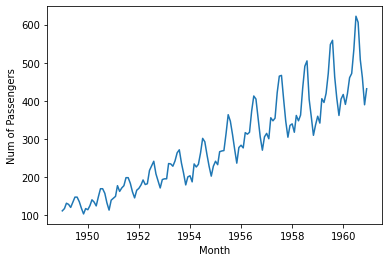

In [6]:
## Plotting simple graph
plt.plot(df_train.index,df_train.values)
plt.xlabel('Month')
plt.ylabel('Num of Passengers')

# Check Autocorrelation

Checking for autocorrelation in time series data is another important part of the analytic process. This is a measure of how correlated time series data is at a given point in time with past values.
High Autocorrelation implies that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well

In [7]:
ac_lag1 = df_train['#Passengers'].autocorr(lag=1)
print('1 Month Lag: ', ac_lag1)
ac_lag3 = df_train['#Passengers'].autocorr(lag=3)
print('2 Month Lag: ', ac_lag3)
ac_lag6 = df_train['#Passengers'].autocorr(lag=6)
print('6 Month Lag: ', ac_lag6)
ac_lag9 = df_train['#Passengers'].autocorr(lag=9)
print('9 Month Lag: ', ac_lag9)

1 Month Lag:  0.9601946480498523
2 Month Lag:  0.837394765081794
6 Month Lag:  0.7839187959206183
9 Month Lag:  0.8278519011167601


Time-series data seems highly autocorrelated.<br> This is also an illustration of the short and long term trends in the data.

## Checking Stationarity of data

## 1. Rolling Statistics

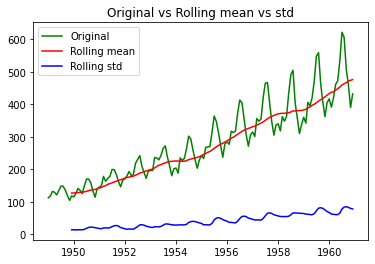

In [8]:

def check_rolling_stats(timeseries):
    #determine statistics
    df_rolling_mean = timeseries.rolling(window=12).mean()
    df_rolling_std = timeseries.rolling(window=12).std()

    #Plotting statistics
    orig_val_plot = plt.plot(timeseries, color='green', label='Original')
    rolling_mean_plot = plt.plot(df_rolling_mean, color='red', label='Rolling mean')
    rolling_std_plot = plt.plot(df_rolling_std, color='blue', label='Rolling std')
    plt.legend()
    plt.title('Original vs Rolling mean vs std')
    plt.show()
    
check_rolling_stats(df_train)

## 2. Dickey-Fuller Test

In [9]:
from statsmodels.tsa.stattools import adfuller

dfuller_test = adfuller(df_train['#Passengers'], autolag='AIC')
dfuller_test

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
dfuller_out = pd.Series(dfuller_test[0:4], index=['Test Statistics','p-value','Lags Used','Num of Observation Used'])
for k,v in dfuller_test[4].items():
    dfuller_out[f'Critical value {k}'] = v

print('Dickey-Fuller test stats:')
dfuller_out


Dickey-Fuller test stats:


Test Statistics              0.815369
p-value                      0.991880
Lags Used                   13.000000
Num of Observation Used    130.000000
Critical value 1%           -3.481682
Critical value 5%           -2.884042
Critical value 10%          -2.578770
dtype: float64

Null Hypothisis (H0): Series is Stationary
Since p-value is greater then 0.05, so we fail to reject our null hypothysis i.e. **this TS is non-stationary series.** <br>
Also, *for stationary TS Test statistic should be smaller than any of the critical values*.


## CONVERTING time-series into Stationary

## 1. Log Transformation

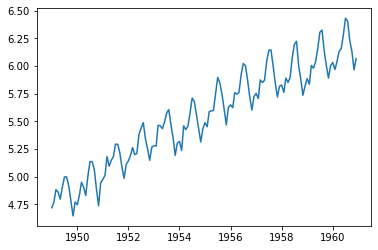

In [11]:
## Estimating trend

df_logScaled = np.log(df_train)
plt.plot(df_logScaled)

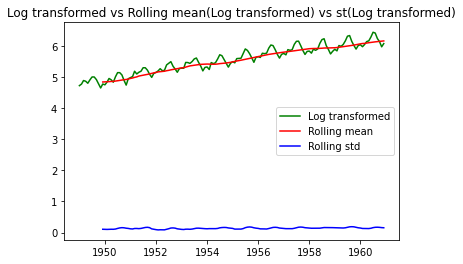

In [12]:
df_moving_mean = df_logScaled.rolling(window=12).mean()
df_moving_std = df_logScaled.rolling(window=12).std()

orig_plot = plt.plot(df_logScaled, color='green', label='Log transformed')
mean_plot = plt.plot(df_moving_mean, color='red', label='Rolling mean')
std_plot = plt.plot(df_moving_std, color='blue', label='Rolling std')
plt.legend(loc='best')
plt.title('Log transformed vs Rolling mean(Log transformed) vs st(Log transformed)')
plt.show()

**again mean is not constant in this transformed data.So, this is not stationary Time Series.**

## 2. Differences

In [13]:
# value = logTransformed - rolling_Mean

df_subtract = df_logScaled - df_moving_mean
df_subtract.dropna(inplace=True)
print(df_logScaled.shape, df_subtract.shape,f'{df_logScaled.shape[0]-df_subtract.shape[0]} null rows deleted')
df_subtract.head()

(144, 1) (133, 1) 11 null rows deleted


,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [14]:
## summing up all into function (to reuse this block)
def check_stationarity(timeseries):
    #determine statistics
    df_rolling_mean = timeseries.rolling(window=12).mean()
    df_rolling_std = timeseries.rolling(window=12).std()

    #Plotting statistics
    orig_val_plot = plt.plot(timeseries, color='green', label='Original')
    rolling_mean_plot = plt.plot(df_rolling_mean, color='red', label='Rolling mean')
    rolling_std_plot = plt.plot(df_rolling_std, color='blue', label='Rolling std')
    plt.legend()
    plt.title('Original vs Rolling mean vs std')
    plt.show()
    
    # Dickey-Fuller Test
    dfuller_test = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfuller_out = pd.Series(dfuller_test[0:4], index=['Test Statistics','p-value','Lags Used','Num of Observation Used'])
    for k,v in dfuller_test[4].items():
        dfuller_out[f'Critical value {k}'] = v

    print('Dickey-Fuller test stats:')
    print(dfuller_out)

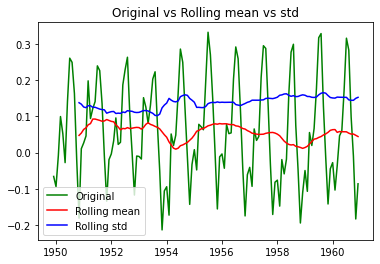

Dickey-Fuller test stats:
Test Statistics             -3.162908
p-value                      0.022235
Lags Used                   13.000000
Num of Observation Used    119.000000
Critical value 1%           -3.486535
Critical value 5%           -2.886151
Critical value 10%          -2.579896
dtype: float64


In [15]:
check_stationarity(df_subtract)

Here, the p-value is less then 0.05.. So we can reject the null hypothesis i.e. Series is Stationary.

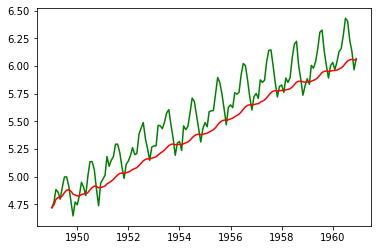

In [16]:
## Checking for exponential decay weighted average
df_edwa = df_logScaled.ewm(halflife=12, min_periods=0, adjust=True).mean() #parameters.... half_life for decay & adjust for viewing EWMA as a moving average
plt.plot(df_logScaled,color='green')
plt.plot(df_edwa, color='red')

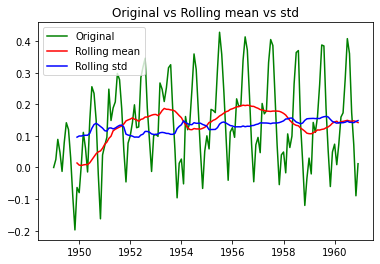

Dickey-Fuller test stats:
Test Statistics             -3.601262
p-value                      0.005737
Lags Used                   13.000000
Num of Observation Used    130.000000
Critical value 1%           -3.481682
Critical value 5%           -2.884042
Critical value 10%          -2.578770
dtype: float64


In [17]:
## Differences
## value = Log_scaled - exponentialDecay_Weighted_avg

df_ls_edwa = df_logScaled - df_edwa
check_stationarity(df_ls_edwa)

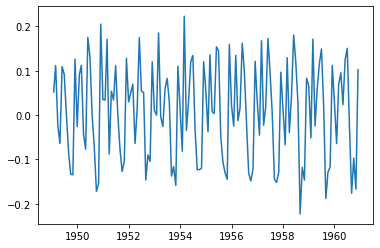

In [18]:
## shifting value in the TimeSeries so that we can use this into forecasting... As earlier we have subtracted the mean from the Time-Series data, 
## the shift() will shift all those values
df_ls_shift = df_logScaled - df_logScaled.shift()
plt.plot(df_ls_shift)

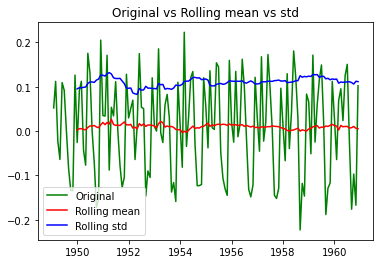

Dickey-Fuller test stats:
Test Statistics             -2.717131
p-value                      0.071121
Lags Used                   14.000000
Num of Observation Used    128.000000
Critical value 1%           -3.482501
Critical value 5%           -2.884398
Critical value 10%          -2.578960
dtype: float64


In [19]:
df_ls_shift.dropna(inplace=True)
check_stationarity(df_ls_shift)

*This looks much better on Visual inspection*<br>
Also, using Dickey-Fuller test outpout, we can say that this time series is Stationary.

## Checking components of time-series

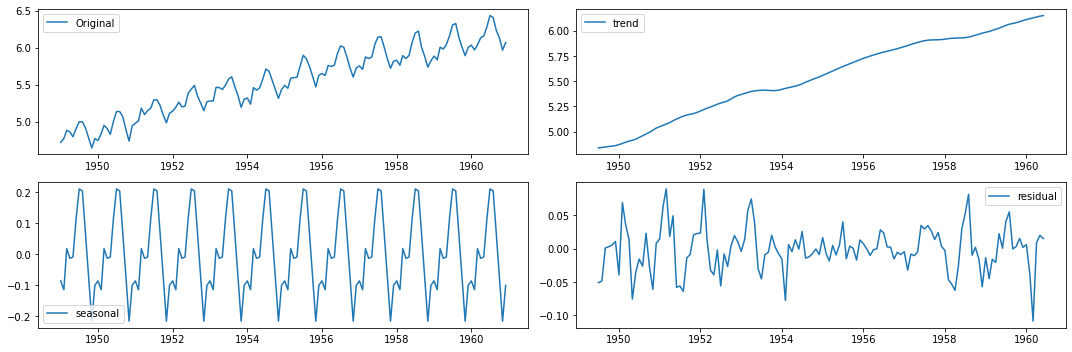

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

d = seasonal_decompose(df_logScaled)

trend = d.trend
seasonal = d.seasonal
residual = d.resid

f,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,5))
ax[0][0].plot(df_logScaled, label='Original')
ax[0][0].legend()
ax[0][1].plot(trend, label='trend')
ax[0][1].legend()
ax[1][0].plot(seasonal, label='seasonal')
ax[1][0].legend()
ax[1][1].plot(residual, label='residual')
ax[1][1].legend()
f.tight_layout()

In [21]:
## Saving transformed data for model building
df_ls_shift.to_csv('Transformed_TimeSeries.csv')

**Now next on next step we will use ARIMA model for forecasting**
<br> I will include that in another notebook ans update the link of that in this.


**Thanks for reading my work. Any suggestions/comments will be appreciated. ANd if you like my work then Do Upvote :)**